# Classification of MNIST digits with different neural network architectures

In [37]:
import keras
from keras.datasets import mnist

# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28x28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [11]:
x_train.shape

(60000, 784)

In [12]:
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


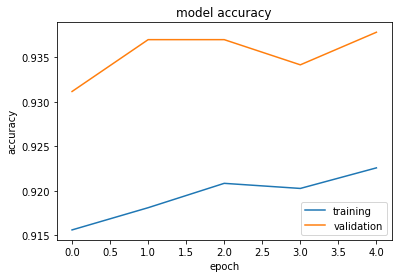

Test loss: 0.29
Test accuracy: 0.922


In [31]:
import matplotlib.pyplot as plt
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [25]:
history.history

{'val_loss': [0.3106592636903127,
  0.293082691748937,
  0.30268022100130715,
  0.2943205858071645,
  0.28558161783218383],
 'val_accuracy': [0.921999990940094,
  0.9288333058357239,
  0.9240000247955322,
  0.9278333187103271,
  0.9309999942779541],
 'loss': [0.35945106758011713,
  0.3467807844214969,
  0.3383386028960899,
  0.3316974820914092,
  0.3219666123036985],
 'accuracy': [0.9099815, 0.91316664, 0.9125, 0.9133148, 0.915463]}

In [33]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


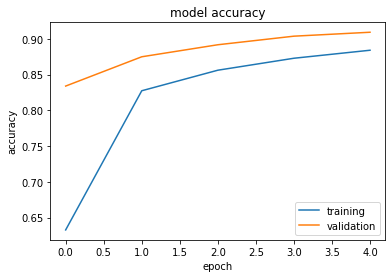


Test loss: 0.489
Test accuracy: 0.885
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


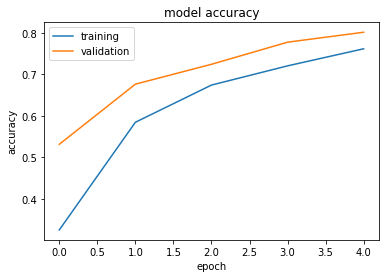


Test loss: 1.25
Test accuracy: 0.783
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


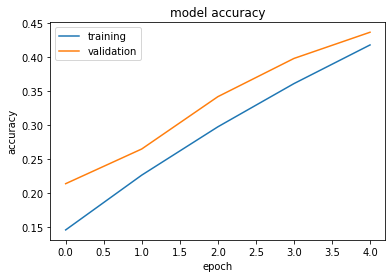


Test loss: 2.13
Test accuracy: 0.424
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


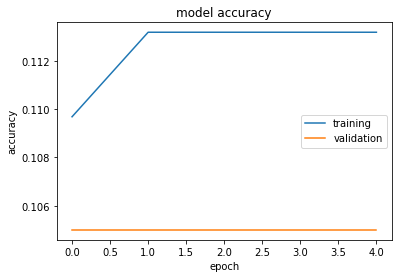


Test loss: 2.29
Test accuracy: 0.113


In [34]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


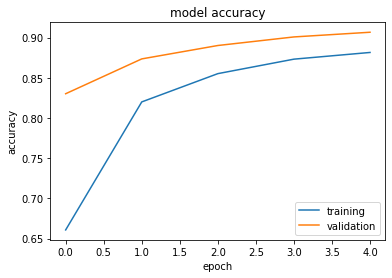


Test loss: 0.479
Test accuracy: 0.892
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


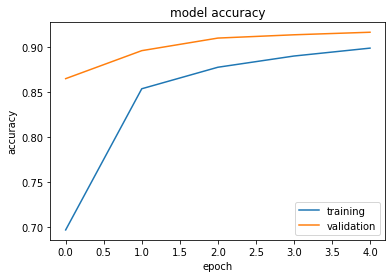


Test loss: 0.381
Test accuracy: 0.906
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


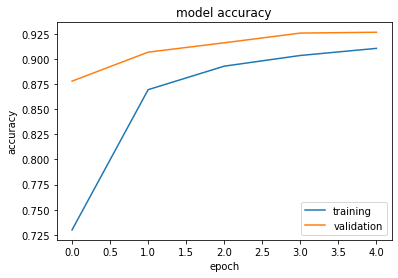


Test loss: 0.323
Test accuracy: 0.913
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


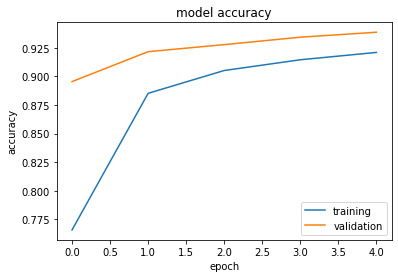


Test loss: 0.277
Test accuracy: 0.924
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_26 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


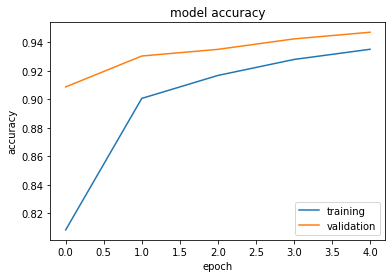


Test loss: 0.239
Test accuracy: 0.934
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_28 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


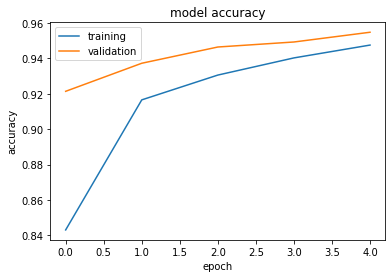


Test loss: 0.205
Test accuracy: 0.944
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_30 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


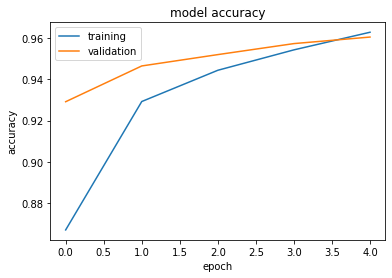


Test loss: 0.178
Test accuracy: 0.951


In [35]:
for nodes in [32, 64, 128, 256, 512, 1024, 2048]:
    model = create_dense([nodes])
    evaluate(model)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


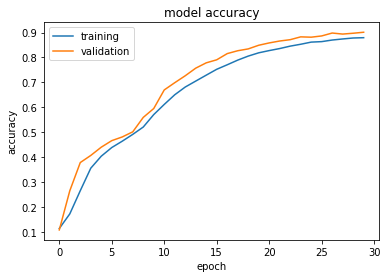


Test loss: 0.538
Test accuracy: 0.884
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_36 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


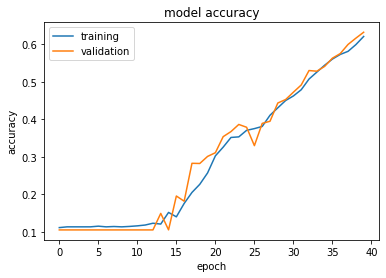


Test loss: 1.19
Test accuracy: 0.631
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_45 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
___________

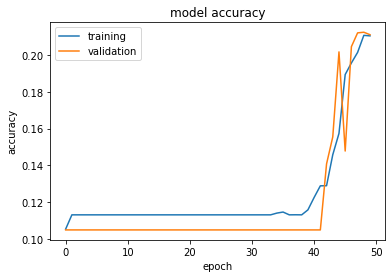


Test loss: 2.24
Test accuracy: 0.207
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_48 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


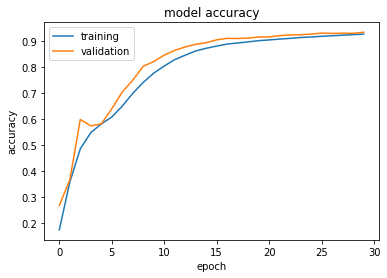


Test loss: 0.283
Test accuracy: 0.927
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


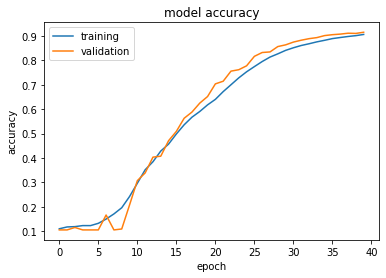


Test loss: 0.391
Test accuracy: 0.902
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_58 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_59 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_60 (Dense)             (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
________

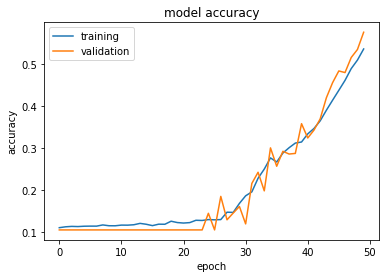


Test loss: 1.4
Test accuracy: 0.578
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_62 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_63 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_64 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


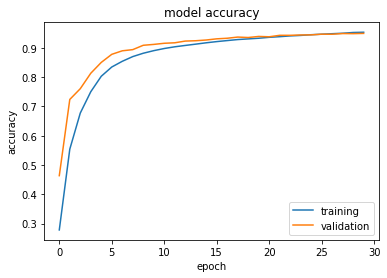


Test loss: 0.214
Test accuracy: 0.938
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_67 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_69 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


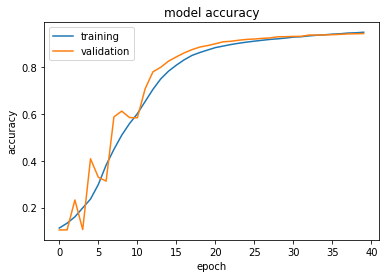


Test loss: 0.247
Test accuracy: 0.933
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_71 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_72 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_73 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_74 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_75 (Dense)             (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
____

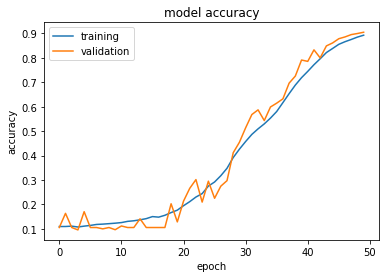


Test loss: 0.456
Test accuracy: 0.885


In [36]:
for nodes_per_layer in [32, 128, 512]:
    for layers in [3, 4, 5]:
        model = create_dense([nodes_per_layer] * layers)
        evaluate(model, epochs=10*layers)

# Classification of MNIST digits with Convolution Neural Network

In [50]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)= mnist.load_data()

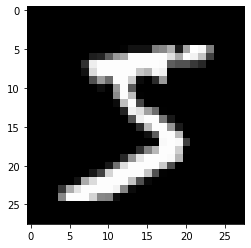

In [39]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))

In [40]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

In [51]:
#Reshaping the array to 4-dims so that it can work with the Keras API
# [pixels][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
input_shape = (28, 28, 1)

# Normalizing the RGB codes by dividing it to the max RGB value.
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [46]:
model = Sequential() 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation = tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(10,activation=tf.nn.softmax))

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x= x_train , y = y_train , epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1987 - accuracy: 0.9395
Epoch 2/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0822 - accuracy: 0.9753
Epoch 3/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0578 - accuracy: 0.9815
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0455 - accuracy: 0.9855
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0372 - accuracy: 0.9873
Epoch 6/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0297 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 8/10
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0244 - accuracy: 0.9916
Epoch 9/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0221 - accuracy: 0.9925
Epoch 10/10
60000/60000 [==============================

In [53]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 304us/step


[0.07033762532109977, 0.9840999841690063]